# Two-dimensional SVR example

A simple Support Vector Regression example. The ellipsoid 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# from explainpolysvm import expsvm
from explainpolysvm import expsvm

In [4]:
save_figs = False

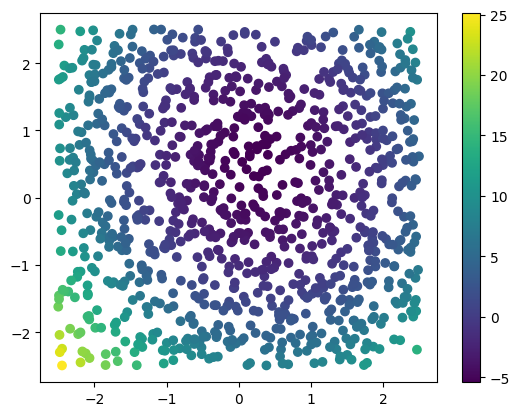

In [5]:
rng = np.random.default_rng(1011)
samples = 1000

max_val = 5
x_all = max_val*(rng.random((samples, 2)) - 0.5)

# Real interaction impact on target 
w_x0 = -1
w_x1 = -0.5
w_x0x0 = 1.5
w_x1x1 = 2.
w_x0x1 = 0.25

# Origin shift
or0 = 0.2
or1 = 0.2
zero_level = 5.
y = w_x0x0*(x_all[:,0] - or0)**2 + w_x1x1*(x_all[:,1] - or1)**2 + w_x0*x_all[:, 0] + w_x1*x_all[:, 1] + w_x0x1*x_all[:, 0]*x_all[:, 1] - zero_level


# fig, ax = plt.subplots(1, 1)
plt.figure()
plt.scatter(x_all[:, 1], x_all[:, 0], c=y)
plt.colorbar()
t = np.linspace(0, 2*np.pi, 100)


In [6]:

x_train, x_test, y_train, y_test = train_test_split(x_all, y, test_size=100, random_state=10)
# Fit SVM
C = 0.9
degree = 2
gamma = 'scale'
r = np.sqrt(2)

# Fit SVM
kernel = 'poly'
model = SVR(C=C, kernel=kernel, degree=degree, gamma=gamma, coef0=r)
model.fit(x_train, y_train)

sv = model.support_vectors_
dual_coef = np.squeeze(model.dual_coef_)
intercept = model.intercept_[0]
kernel_gamma = model._gamma

es = expsvm.ExPSVM(sv=sv, dual_coef=dual_coef, intercept=intercept,
                kernel_d=degree, kernel_r=r, kernel_gamma=kernel_gamma)
es.transform_svm()

In [7]:
y_pred = es.decision_function(x=x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Test MSE: {mse}')
print(f'Test R2: {r2}')

Test MSE: 0.004732367406760676
Test R2: 0.9998202080702414


In [8]:
es.intercept

-4.759663384952826

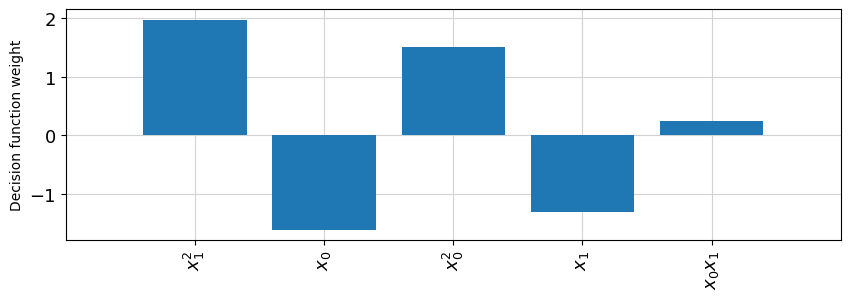

In [9]:
fig = es.plot_model_bar(n_features=40, magnitude=False, figsize=(10,3), show=False)
# fig.gca().grid(alpha=1)
fig.gca().set_axisbelow(True)
fig.gca().grid(color='lightgray')
fig.gca().tick_params(axis='both', labelsize=13)
fig.gca().set_title('')
fig.gca().set_xlabel('')
if save_figs:
    plt.savefig('./images/feature_importance_signed_wbcd.png', dpi=200, bbox_inches='tight', facecolor='white')
    plt.savefig('./images/feature_importance_signed_wbcd.eps', bbox_inches='tight', facecolor='white')
fig.show(warn=False)

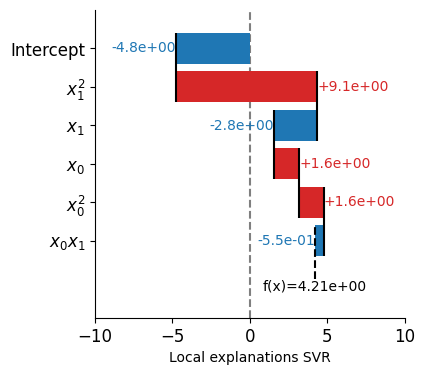

In [10]:
# Negative sample
show_ind = 0
x_show = x_test[show_ind,:]

# Plot interaction importance
fig = es.plot_sample_waterfall(x_show, n_features=None, show=False, show_values=True, show_sum=True, figsize=(4,4), xlim=[-10, 10])
# fig.gca().set_title('Interaction contribution in a single negative sample')
fig.gca().set_xlabel('Local explanations SVR')
fig.gca().tick_params(axis='both', labelsize=12)
if save_figs:
    plt.savefig('./images/feature_importance_single_negative_wbcd.png', dpi=200, bbox_inches='tight', facecolor='white')
    plt.savefig('./images/feature_importance_single_negative_wbcd.eps', bbox_inches='tight', facecolor='white')
fig.show(warn=False)
